In [1]:
!pip install keras

In [2]:
!pip install tensorflow


In [3]:
!pip install pandas

In [4]:
!pip install numpy

!pip install matplotlib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Create feature set and target set
x=df.iloc[:,3:13]
y=df.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
geography=pd.get_dummies(x["Geography"],dtype=int)
geography
gender=pd.get_dummies(x["Gender"],drop_first=True,dtype=int)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
##Concatenate the dataFrames
x=pd.concat([x,geography,gender],axis=1)
##Drop Unnecessary columns

x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
!pip install sklearn
!pip install scikit-learn

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=3)

In [13]:
#Feature scaling to reduce the time for calculation of weights(Derivatives)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
#from keras.layers import Dropout

In [15]:
#initialising ANN
classifier = Sequential()


classifier.add(Dense(6,  kernel_initializer= 'he_uniform',activation='relu',input_dim = 12))

In [16]:
#adding second hidden layer
classifier.add(Dense(6,  kernel_initializer= 'he_uniform',activation='relu'))

#adding output layer

classifier.add(Dense(1,   kernel_initializer='glorot_uniform',activation='sigmoid'))

In [17]:
#compling ANN
classifier.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=['accuracy'])

In [18]:
model_history=classifier.fit(x_train, y_train ,validation_split=0.33, batch_size=10, epochs = 10)

Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 0.6354 - accuracy: 0.6462 - val_loss: 0.5299 - val_accuracy: 0.7891
Epoch 2/10
536/536 [==============================] - 0s 863us/step - loss: 0.5099 - accuracy: 0.7895 - val_loss: 0.4853 - val_accuracy: 0.8001
Epoch 3/10
536/536 [==============================] - 0s 847us/step - loss: 0.4865 - accuracy: 0.7932 - val_loss: 0.4698 - val_accuracy: 0.8008
Epoch 4/10
536/536 [==============================] - 0s 807us/step - loss: 0.4755 - accuracy: 0.7942 - val_loss: 0.4595 - val_accuracy: 0.8016
Epoch 5/10
536/536 [==============================] - 0s 817us/step - loss: 0.4668 - accuracy: 0.7947 - val_loss: 0.4511 - val_accuracy: 0.8027
Epoch 6/10
536/536 [==============================] - 0s 815us/step - loss: 0.4594 - accuracy: 0.7955 - val_loss: 0.4445 - val_accuracy: 0.8042
Epoch 7/10
536/536 [==============================] - 0s 810us/step - loss: 0.4527 - accuracy: 0.7972 - val_loss: 0.4388 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


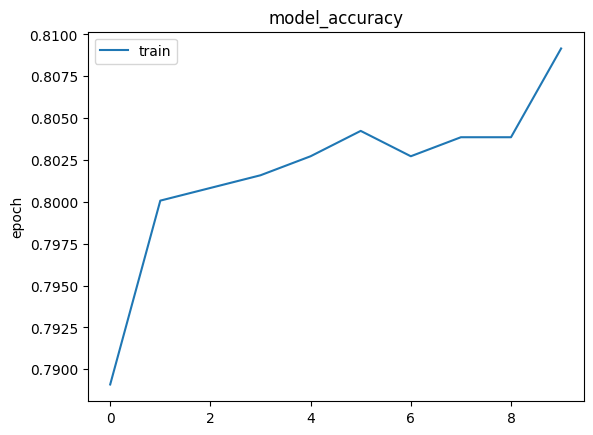

In [19]:
#list all data in history
print(model_history.history.keys())
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


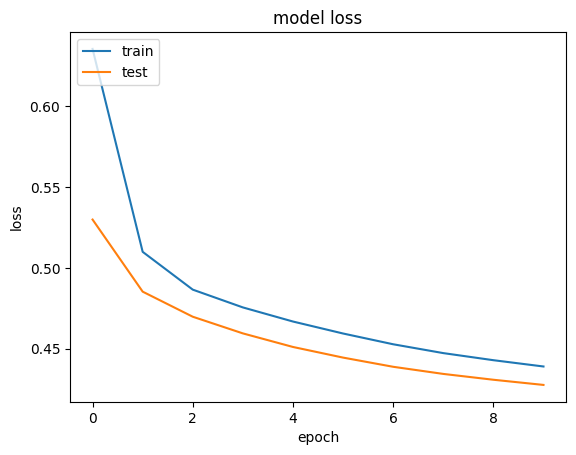

In [20]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
#part-3 making the predictiond and evaluating
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 515us/step


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.81